# Multi Layer Perceptron Implementation

## Load the Data

In [54]:
import numpy as np


data = np.load('data.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
  

## Build the Model

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.metrics import Precision, Recall
from keras import backend as K
from keras.regularizers import l2




def evaluate_model(model, X_train, y_train):

    # Reset the session
    K.clear_session()
    
    # Compile the model
    model.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy', Precision(), Recall()])

    # Train the model
    #model.fit(X_train, y_train, epochs=25, batch_size=32)
    model.fit(X_train, y_train, epochs=25, batch_size=32)

    
    # Evaluate the model
    loss, accuracy, precision, recall = model.evaluate(X_test, y_test)

    return loss, accuracy, precision, recall

## Build different Model Structures

In [56]:
def create_model_1():
    model_1 = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(32, activation='relu',kernel_regularizer=l2(0.001)),
        Dropout(0.25),
        Dense(1, activation='sigmoid')

    ])
    return model_1

def create_model_2():
    model_2 = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(16, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model_2

def create_model_3():
    model_3 = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(1, activation='sigmoid')
    ])
    return model_3

def create_model_4():
    model_4 = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dropout(0.25),
        Dense(1, activation='sigmoid')
    ])
    return model_4


## Train the different Models

In [57]:
model_1 = create_model_1()
model_2 = create_model_2()
model_3 = create_model_3()
model_4 = create_model_4()

models = [model_1, model_2, model_3, model_4]
model_metrics = []
model_pred = []

for model in models:
    
    #Get the details
    loss, accuracy, precision, recall = evaluate_model(model, X_train, y_train)
    model_metrics.append([accuracy, precision, recall])
    
    # Make the Predictions
    y_pred = model.predict(X_test)
    model_pred.append(y_pred)

Epoch 1/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.4205 - loss: 1275970432.0000 - precision: 0.0269 - recall: 0.5362
Epoch 2/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.9136 - loss: 82359072.0000 - precision: 0.0200 - recall: 0.0322      
Epoch 3/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.9281 - loss: 65706024.0000 - precision: 0.0421 - recall: 0.0520     
Epoch 4/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.9285 - loss: 59066036.0000 - precision: 0.0230 - recall: 0.0265      
Epoch 5/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.9310 - loss: 44136620.0000 - precision: 0.0357 - recall: 0.0426     
Epoch 6/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.9318 - loss: 33209626.0000 - precision: 0.0554 - recall: 0.0661     
Epoch 7/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.9391 - loss: 30352390.0000 - precision: 0.0529 - recall: 0.0585    
Epoch 8/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 

## Results

In [61]:
from sklearn.metrics import classification_report, accuracy_score

# Iterate who all the models
for idx in range(len(model_pred)):

    print(y_pred)
    # print(f'Model {idx + 1}')
    # print("Accuracy:", accuracy_score(y_test, y_pred))
    # print("\nClassification Report:\n", classification_report(y_test, y_pred))

[[0.05160412]
 [0.05160412]
 [0.05160412]
 ...
 [0.        ]
 [0.05160412]
 [0.05160412]]
[[0.05160412]
 [0.05160412]
 [0.05160412]
 ...
 [0.        ]
 [0.05160412]
 [0.05160412]]
[[0.05160412]
 [0.05160412]
 [0.05160412]
 ...
 [0.        ]
 [0.05160412]
 [0.05160412]]
[[0.05160412]
 [0.05160412]
 [0.05160412]
 ...
 [0.        ]
 [0.05160412]
 [0.05160412]]


## Graph the Results 

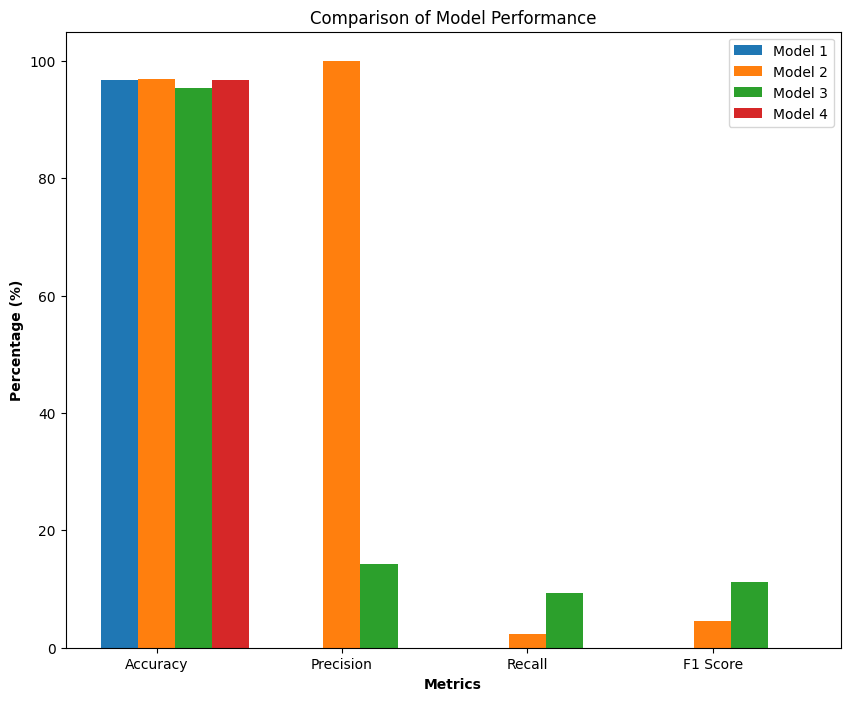

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Convert metrics to percentages for visualization
model_metrics_percentages = [[metric * 100 for metric in model] for model in model_metrics]

# Metrics labels
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models_labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.2

# Positions of the bars on the x-axis
r = np.arange(len(metrics_labels))

for i, model in enumerate(model_metrics_percentages):
    plt.bar(r + i * bar_width, model, width=bar_width, label=models_labels[i])

plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(metrics_labels))], metrics_labels)

plt.legend()
plt.title('Comparison of Model Performance')
plt.show()



In [ ]:
model_1.summary()
model_2.summary()
model_3.summary()
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,317 (36.40 KB)

 Trainable params: 3,105 (12.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,212 (24.27 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,661 (18.21 KB)

 Trainable params: 1,553 (6.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,108 (12.14 KB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,317 (36.40 KB)

 Trainable params: 3,105 (12.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,212 (24.27 KB)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,333 (9.12 KB)

 Trainable params: 777 (3.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,556 (6.08 KB)